# **Urkesh Cusack, NLP > Large Language Models**

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive', force_remount=True)
%cd /content/drive/My Drive/YALE/LLM/hw2

Mounted at /content/drive
/content/drive/My Drive/YALE/LLM/hw2


In [ ]:
#Check directory to see if files needed are in the directory
!ls '/content/drive/My Drive/YALE/LLM/hw2'

'Generative AI-Future of work in America.pdf'   restaurant-dine-in-menu.pdf
 hw2.ipynb				       'Untitled document.gdoc'
 key.py


In [ ]:
%%capture
!pip install  langchain     #Langchain
!pip install  "openai<=0.28.1"  #OpenAI pre-11/07

!pip install pypdf          #loader for pdfs // https://pypdf.readthedocs.io/en/stable/
!pip install unstructured   #loader for unstructured text data
!pip install pypandoc       #universal document converter
!pip install chromadb       #Vector database

!pip install tiktoken       #tokenizer for Open AI models
!pip install streamlit      #GUI for apps
!pip install cohere         #RAG
!pip install wikipedia
!pip install google-search-results    #Google Search for SerpAPI
!pip install yfinance         #Yahoo Finance
!pip install wolframalpha     #Wolfram Alpha for fancy science computations,algebraic solutions, and scientific facts
!pip install pyowm            #Openweathermap
!pip install serpapi


In [ ]:
# Import the OPEN AI API key from key.py
from key import OPENAI_API_KEY
#openai.api_key = OPENAI_API_KEY
os.environ["OPENAI_API_KEY"] = OPENAI_API_KEY

# Import the COHERE API key from key.py
from key import COHERE_API_KEY
os.environ["COHERE_API_KEY"] = COHERE_API_KEY

from key import WOLFRAM_ALPHA_APPID
os.environ["WOLFRAM_ALPHA_APPID"] = WOLFRAM_ALPHA_APPID

from key import SERPAPI_API_KEY
os.environ["SERPAPI_API_KEY"] = SERPAPI_API_KEY

from key import OPENWEATHERMAP_API_KEY
os.environ["OPENWEATHERMAP_API_KEY"] = OPENWEATHERMAP_API_KEY

from key import GOOGLE_API_KEY
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

from key import GOOGLE_CSE_ID
os.environ["GOOGLE_CSE_ID"] = GOOGLE_CSE_ID

# Specify the path to your uploaded .py file

# Open and read the file
# with open(file_path, 'r') as file:
#   file_contents = file.read()

# Display the file contents
# print(file_contents)

# Question 1

## Part 1: Comparing OpenAI embeddings with Different Chunking Sizes

### a. Result using: (chunk_size=2000, chunk_overlap=500)

In [ ]:
import os
import key
import openai
import textwrap

#Libraries for Document Loaders
from langchain.document_loaders import PyPDFLoader

#Libraries for Document Splitting, embeddings and vector stores
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

#Chain for Q&A after retrieving external documents
from langchain.chains import RetrievalQA

#Using ChatOpenAI
from langchain.chat_models import ChatOpenAI            #used for GPT3.5/4 model
os.environ["OPENAI_API_KEY"] = key.OPENAI_API_KEY

# Loading documents (A scholarly paper)
loader = PyPDFLoader("Generative AI-Future of work in America.pdf")
documents = loader.load()
#print(documents)          # print to ensure document loaded correctly--comment out after checking
#print('\n')

#Splitting Documents into Chunks for embeddings and the store them in vector stores
# chunksize and chunkoverlap are key parameters to ensure that things work

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=20, chunk_overlap=5)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=25)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=500)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=2500)
chunks = text_splitter.split_documents(documents)

# to see the chunks
print(chunks[0])
print(chunks[1])
print("\n")

#Store the chunks as embeddings within a vector store

#from chromadb.utils import embedding_functions
from langchain.embeddings import CohereEmbeddings
######

# Import the COHERE API key from key.py
from key import COHERE_API_KEY
os.environ["COHERE_API_KEY"] = COHERE_API_KEY
embeddings = OpenAIEmbeddings()

# embeddings = CohereEmbeddings(model="embed-english-light-v3.0", cohere_api_key=COHERE_API_KEY) # https://api.python.langchain.com/en/latest/embeddings/langchain.embeddings.cohere.CohereEmbeddings.html
######

################## I have found a way to prevent the dimensionality error ##################
from chromadb.errors import InvalidDimensionException
try:
    vector_store = Chroma.from_documents(chunks, embeddings)
except InvalidDimensionException:
    Chroma().delete_collection()
    vector_store = Chroma.from_documents(chunks, embeddings)
############################################################################################

# initialize OpenAI instance and set up a chain for Q&A from an LLM and a vector score
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0)
retriever=vector_store.as_retriever()
chain = RetrievalQA.from_chain_type(llm, retriever=retriever)


# Run chain with question
question = "What share of the U.S. jobs will be affected by automation?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))
print('\n')
question = "How will generative AI impact the importance of credentials relative to experience in hiring?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))

page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government \nGenerative \nAI and the \nfuture of work \nin America' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 0}
page_content='Cover illustration by Matt Murphy' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 1}


What share of the U.S. jobs will be affected by automation?
By 2030, activities that account for up to 30 percent of hours currently
worked across the US economy could be automated. However, it is important
to note that this does not necessarily mean that 30 percent of jobs will be
eliminated. Automation is likely to have a greater impact on certain job
categories, such as office support, customer service, and food service
employment, which could continue to decline. On the other hand, automation
is expected to enhance the way ST

!!! Disclaimer: During the debugging process sometimes is necesary to re-start runtime to clean cache. So the answers that the code return may differ from what it is manually written as maybe it was copy&pasted before

What share of the U.S. jobs will be affected by automation?



According to the information provided, without generative AI, automation
could take over tasks accounting for 21.5 percent of the hours worked in
the US economy by 2030. However, with generative AI added to the picture,
that share has now jumped to 29.5 percent. It's important to note that this
is the midpoint estimate, representing the average of a wide range, from
3.7 to 55.3 percent.

How will generative AI impact the importance of credentials relative to experience in hiring?

Generative AI has the potential to impact the importance of credentials
relative to experience in hiring. Currently, many employers prioritize
candidates with prior experience that closely matches the responsibilities
of the open role. However, with the introduction of generative AI tools,
employers can evaluate candidates based on their capacity to learn,
intrinsic capabilities, and transferable skills. This broader lens in
hiring allows employers to focus on a candidate's potential rather than
solely relying on their past experience. Generative AI can assist in
identifying patterns and generating new content, which can be valuable in
various work activities. As a result, employers may place less emphasis on
specific credentials and instead prioritize candidates who demonstrate the
ability to adapt and learn new skills, as well as possess transferable
skills that can be applied to different roles.

### b. Result using: (chunk_size=100, chunk_overlap=25)

In [ ]:
import os
import key
import openai
import textwrap

#Libraries for Document Loaders
from langchain.document_loaders import PyPDFLoader

#Libraries for Document Splitting, embeddings and vector stores
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

#Chain for Q&A after retrieving external documents
from langchain.chains import RetrievalQA

#Using ChatOpenAI
from langchain.chat_models import ChatOpenAI            #used for GPT3.5/4 model
os.environ["OPENAI_API_KEY"] = key.OPENAI_API_KEY

# Loading documents (A scholarly paper)
loader = PyPDFLoader("Generative AI-Future of work in America.pdf")
documents = loader.load()
#print(documents)          # print to ensure document loaded correctly--comment out after checking
#print('\n')

#Splitting Documents into Chunks for embeddings and the store them in vector stores
# chunksize and chunkoverlap are key parameters to ensure that things work

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=20, chunk_overlap=5)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=25)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=500)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=2500)
chunks = text_splitter.split_documents(documents)

# to see the chunks
print(chunks[0])
print(chunks[1])
print("\n")

#Store the chunks as embeddings within a vector store

#from chromadb.utils import embedding_functions
from langchain.embeddings import CohereEmbeddings
######

# Import the COHERE API key from key.py
from key import COHERE_API_KEY
os.environ["COHERE_API_KEY"] = COHERE_API_KEY
embeddings = OpenAIEmbeddings()

# embeddings = CohereEmbeddings(model="embed-english-light-v3.0", cohere_api_key=COHERE_API_KEY) # https://api.python.langchain.com/en/latest/embeddings/langchain.embeddings.cohere.CohereEmbeddings.html
######

################## I have found a way to prevent the dimensionality error ##################
from chromadb.errors import InvalidDimensionException
try:
    vector_store = Chroma.from_documents(chunks, embeddings)
except InvalidDimensionException:
    Chroma().delete_collection()
    vector_store = Chroma.from_documents(chunks, embeddings)
############################################################################################



# initialize OpenAI instance and set up a chain for Q&A from an LLM and a vector score
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0)
retriever=vector_store.as_retriever()
chain = RetrievalQA.from_chain_type(llm, retriever=retriever)


# Run chain with question
question = "What share of the U.S. jobs will be affected by automation?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))
print('\n')
question = "How will generative AI impact the importance of credentials relative to experience in hiring?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))

page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 0}
page_content='Michael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 0}


What share of the U.S. jobs will be affected by automation?
According to the information provided, it is stated that millions of jobs
could potentially be eliminated by automation. However, the exact share or
percentage of U.S. jobs that will be affected by automation is not
specified.


How will generative AI impact the importance of credentials relative to experience in hiring?
The provided context does not directly address the impact of generative AI
on the importance of credentials relative to experience in hiring.
Therefore, it is unclear how generative AI will specifically affect the
importance of c

!!! Disclaimer: During the debugging process sometimes is necesary to re-start runtime to clean cache. So the answers that the code return may differ from what it is manually written as maybe it was copy&pasted before

What share of the U.S. jobs will be affected by automation?

By 2030, activities that account for up to 30 percent of hours currently
worked across the US economy could be automated. However, it is important
to note that this does not necessarily mean that 30 percent of jobs will be
eliminated. Automation is more likely to impact specific tasks within jobs
rather than entire occupations. The effects of automation are expected to
vary across different job categories, with office support, customer
service, and food service employment being more susceptible to decline.

How will generative AI impact the importance of credentials relative to experience in hiring?

The provided context does not directly address the impact of generative AI
on the importance of credentials relative to experience in hiring.
Therefore, it is not possible to determine how generative AI will
specifically impact the importance of credentials compared to experience in the hiring process.

### Analysis

Having a bigger chunk size and overlap makes the LLM perform better. It is intuitive that if you gave less information the answer will be poorer and the results are also shorter an less precise.

## Part 2: Comparing OpenAI and Cohere Embeddings

In [ ]:
import os
import key
import openai
import textwrap

#Libraries for Document Loaders
from langchain.document_loaders import PyPDFLoader

#Libraries for Document Splitting, embeddings and vector stores
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Chroma

#Chain for Q&A after retrieving external documents
from langchain.chains import RetrievalQA

#Using ChatOpenAI
from langchain.chat_models import ChatOpenAI            #used for GPT3.5/4 model
os.environ["OPENAI_API_KEY"] = key.OPENAI_API_KEY

# Loading documents (A scholarly paper)
loader = PyPDFLoader("Generative AI-Future of work in America.pdf")
documents = loader.load()
#print(documents)          # print to ensure document loaded correctly--comment out after checking
#print('\n')

#Splitting Documents into Chunks for embeddings and the store them in vector stores
# chunksize and chunkoverlap are key parameters to ensure that things work

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=20, chunk_overlap=5)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=100, chunk_overlap=25)
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=500)
# text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=2500)
chunks = text_splitter.split_documents(documents)

# to see the chunks
print(chunks[0])
print(chunks[1])
print("\n")

#Store the chunks as embeddings within a vector store

from chromadb.utils import embedding_functions
from langchain.embeddings import CohereEmbeddings
######

# Import the COHERE API key from key.py
from key import COHERE_API_KEY
os.environ["COHERE_API_KEY"] = COHERE_API_KEY
#embeddings = OpenAIEmbeddings()

embeddings = CohereEmbeddings( model="embed-english-v3.0", cohere_api_key=COHERE_API_KEY) # https://api.python.langchain.com/en/latest/embeddings/langchain.embeddings.cohere.CohereEmbeddings.html
######

################## I have found a way to prevent the dimensionality error ##################
from chromadb.errors import InvalidDimensionException
try:
    vector_store = Chroma.from_documents(chunks, embeddings)
except InvalidDimensionException:
    Chroma().delete_collection()
    vector_store = Chroma.from_documents(chunks, embeddings)
############################################################################################

# initialize OpenAI instance and set up a chain for Q&A from an LLM and a vector score
llm = ChatOpenAI(model='gpt-3.5-turbo', temperature=0)
retriever=vector_store.as_retriever()
chain = RetrievalQA.from_chain_type(llm, retriever=retriever)


# Run chain with question
question = "What share of the U.S. jobs will be affected by automation?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))
print('\n')
question = "How will generative AI impact the importance of credentials relative to experience in hiring?"
response = chain.run(question)
print(question)
print(textwrap.fill(response,75))

page_content='July 2023\nAuthors\nKweilin Ellingrud\nSaurabh Sanghvi\nGurneet Singh Dandona\nAnu Madgavkar\nMichael Chui\nOlivia White\nPaige Hasebe\nEditor \nLisa RenaudMcKinsey Center for Government \nGenerative \nAI and the \nfuture of work \nin America' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 0}
page_content='Cover illustration by Matt Murphy' metadata={'source': 'Generative AI-Future of work in America.pdf', 'page': 1}


What share of the U.S. jobs will be affected by automation?
The provided context does not explicitly state the share of U.S. jobs that
will be affected by automation. However, it mentions that automation has
the biggest impact among the factors considered in the research. The
research incorporates data from the Bureau of Labor Statistics (BLS) and
O*NET to assess the potential for automation in about 2,100 constituent
activities across 850 occupations. It also mentions estimating occupational
transitions and job losses due to var

What share of the U.S. jobs will be affected by automation?

The provided context does not explicitly state the share of U.S. jobs that
will be affected by automation. However, it mentions that automation has
the biggest impact among the factors considered in the research. The
research incorporates data from the Bureau of Labor Statistics (BLS) and
O*NET to assess the potential for automation in about 2,100 constituent
activities across 850 occupations. It also considers the feasibility of
automation adoption and deployment. The analysis estimates occupational
transitions and job losses but does not provide a specific share of jobs
affected by automation.


How will generative AI impact the importance of credentials relative to experience in hiring?

Generative AI is expected to impact the importance of credentials relative
to experience in hiring. As the technology advances, employers may shift
their focus from traditional credentials, such as degrees and
certifications, towards evaluating candidates based on their capacity to
learn, intrinsic capabilities, and transferable skills. This means that
employers may prioritize candidates who demonstrate the ability to adapt
and learn new skills, rather than solely relying on formal qualifications.
Additionally, generative AI can help identify individuals who have taken
unconventional career paths but possess the necessary skills and potential
for success. Overall, the impact of generative AI on hiring practices
suggests a potential shift towards a more skills-based and adaptable
workforce.

#### Analysis

Looks like the result with Coherence is considerable worse than using OpenAI Embeddings. The first question was not even answered, and the second looks similar but there are parts with awkward redaction.

# Question 2

Q1: Who reached the peak of Mount Everest first? \
Q2: When was that? \
Q3: What is the typical pace of a climber trying to scale the peak in feet per hour? \
Q4: If one could hold that steady space, how long would it take to scale the peak?

## Part 1

### a. Which type of Agent in LangChain would you need? Explain briefly

If you want to do something siple, we would need ConversationalRetrievalChain alongside with a memory, which can be ConversationBufferMemory(),ConversationBufferWindowMemory(k=n), or ConversationTokenBufferMemory(llm=llm, max_token_limit=n).

However, the result might be unaccurate as the information might not be in the LLMs and we might need to access to external data.

I this case, I would suggest using ReAct framework, and access to Wikipedia. I would use a conversational Agent with zero shots- ZERO_SHOTS_REACT_DESCRIPTION

### b. What tools would you need? Explain briefly in 1-2 sentences for each tool.

A piori I would say that 'Wikipedia' tool can give as a nice output but only for Q1 and Q2. As LLMs are not equipped to do math, for Q3 I might need Google 'wolfram-alpha' just to ask for the typical pace of a climber, and for Q4 we would need an additional Tool to do calculations 'llm-math' \

'Wikipedia' tool allows us to search for information in real time in the website of Wikipedia. This is a great way to coplement the information that the LLMs have in their training data, as that data is limited and can be outdated. This will help us to get the answers for Q1 (who) and Q2 (when), and partially Q3 (peak). \


'llm-math' tool allows us to so come calculations needed. The LLMs cannot do calculations, so rely in this kind of tools that basically transform the NLP to Python code (or other language), create a snippet to solve the problem, solve the problem, and give us the output in an NLP way. In this case we will use it for Q4 (how long) \

In addition to that, it would be preferable to find some information for Q3 (pace) using SerpApi to connect to Google Search, or directly google-search.

### c. What type of memory would you use by default?

Answers to Questions Q2, Q3 and Q4 depends on the answers of the previous ones, so for a accurate answer we would at least need ConversationBufferWindowMemory(k=4). In order to have the best possible result I would use ConversationTokenBufferMemory(llm=llm, max_token_limit=n) with a max_token_limit set to prevent us to spend too much tokens (i.e. money) during the process.

## Part 2

Write the code for this agent. Show the python code and the output of the conversation with
each question.

In [ ]:
from langchain.agents import load_tools, AgentType, initialize_agent, tool
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI

from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.memory import ConversationBufferWindowMemory
from langchain.memory import ConversationTokenBufferMemory
from langchain.memory import ConversationSummaryBufferMemory


llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

tool_names =["google-search", 'wikipedia', "openweathermap-api", "llm-math"] ## I did not use SerpAPI, I used google-seacrh directly :)
tools = load_tools(tool_names, llm)

memory = ConversationTokenBufferMemory(memory_key='chat_history', return_messages=True, llm=llm, max_token_limit=500)
memory.save_context({"input": "Give me a direct answer. Spartan mode. Without too much explanation"}, {"output": "ok"}) ## I added this context to have a more direct answer
memory.load_memory_variables({})

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    memory=memory,
)


## https://github.com/serpapi/google-search-results-python

Q1 run by Agent:

In [ ]:
input_data = {
    'chat_history': memory,
    'input': 'Who reached the peak of Mount Everest first?'
}
print(agent.run(input_data))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "First ascent of Mount Everest"
}

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: 1953 British Mount Everest expedition
Summary: The 1953 British Mount Everest expedition was the ninth mountaineering expedition to attempt the first ascent of Mount Everest, and the first confirmed to have succeeded when Tenzing Norgay and Edmund Hillary reached the summit on 29 May 1953. Led by Colonel John Hunt, it was organised and financed by the Joint Himalayan Committee. News of the expedition's success reached London in time to be released on the morning of Queen Elizabeth II's coronation, on 2 June that year.

Page: 1924 British Mount Everest expedition
Summary: The 1924 British Mount Everest expedition was—after the 1922 British Mount Everest expedition—the 2nd expedition with the goal of achieving the first ascent of Mount Everest.: 1  After two summit attempts in which Edward Norton set a world altitude record of 8,572.8 metres (28,126 ft),: 11  the mountaineers George Mallory and Andrew "Sandy" Irvine disappeared on the third attempt. Their disappearanc

Q2 run by Agent

In [ ]:
input_data = {
    'chat_history': memory,
    'input': 'When was that?'
}
print(agent.run(input_data))



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "1953"
}

> Finished chain.
1953


Q3 run by Agent

In [ ]:
input_data = {
    'chat_history': memory,
    'input': 'What is the typical pace of a climber trying to scale the peak in feet per hour?'
}
print(agent.run(input_data))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "Mount Everest"
}
Observation: Page: Mount Everest
Summary: Mount Everest (Nepali: सगरमाथा, romanized: Sagarmāthā; Tibetan: Chomolungma ཇོ་མོ་གླང་མ; Chinese: 珠穆朗玛峰; pinyin: Zhūmùlǎngmǎ Fēng) is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas. The China–Nepal border runs across its summit point. Its elevation (snow height) of 8,848.86 m (29,031 ft 8+1⁄2 in) was most recently established in 2020 by the Chinese and Nepali authorities.Mount Everest attracts many climbers, including highly experienced mountaineers. There are two main climbing routes, one approaching the summit from the southeast in Nepal (known as the "standard route") and the other from the north in Tibet. While not posing substantial technical climbing challenges on the standard route, Everest presents dangers such as altitude sickness, weather, and wind, as well as hazards from ava

Q4 run by Agent

In [ ]:
input_data = {
    'chat_history': memory,
    'input': 'If one could hold that steady space, how long would it take to scale the peak?'
}
print(agent.run(input_data))



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "Scaling the peak of Mount Everest typically takes several weeks, with climbers spending time acclimatizing at various camps along the way. The actual time it takes to reach the summit can vary depending on factors such as weather conditions, the climber's fitness level, and the specific route taken. On average, it can take anywhere from 7 to 10 days to reach the summit from the base camp."
}

> Finished chain.
Scaling the peak of Mount Everest typically takes several weeks, with climbers spending time acclimatizing at various camps along the way. The actual time it takes to reach the summit can vary depending on factors such as weather conditions, the climber's fitness level, and the specific route taken. On average, it can take anywhere from 7 to 10 days to reach the summit from the base camp.


## Part 3

How would these results compare if you had tried to do the step by search yourself? Would your answer differ? What are the reasons for any difference you identify?

What I understood from this question is that the intention is to do the process without memory. I also changed the Agent to CHAT_ZERO_SHOT_REACT_DESCRIPTION. I also set a timeout=60  

In [ ]:
from langchain.agents import load_tools, AgentType, initialize_agent, tool
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI

from langchain.chains import ConversationChain

llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

tool_names =["google-search", 'wikipedia', "openweathermap-api", "llm-math"]
tools = load_tools(tool_names, llm)

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.CHAT_ZERO_SHOT_REACT_DESCRIPTION,
    handle_parsing_errors=True,
    verbose=True,
    timeout=60  # Set a timeout of 60 seconds
)



In [ ]:
print(agent.run("Who reached the peak of Mount Everest first?"))



> Entering new AgentExecutor chain...
Thought: I need to find out who reached the peak of Mount Everest first. I can use Wikipedia to search for this information.

Action:
```
{
  "action": "Wikipedia",
  "action_input": "First ascent of Mount Everest"
}
```

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: 1953 British Mount Everest expedition
Summary: The 1953 British Mount Everest expedition was the ninth mountaineering expedition to attempt the first ascent of Mount Everest, and the first confirmed to have succeeded when Tenzing Norgay and Edmund Hillary reached the summit on 29 May 1953. Led by Colonel John Hunt, it was organised and financed by the Joint Himalayan Committee. News of the expedition's success reached London in time to be released on the morning of Queen Elizabeth II's coronation, on 2 June that year.

Page: 1924 British Mount Everest expedition
Summary: The 1924 British Mount Everest expedition was—after the 1922 British Mount Everest expedition—the 2nd expedition with the goal of achieving the first ascent of Mount Everest.: 1  After two summit attempts in which Edward Norton set a world altitude record of 8,572.8 metres (28,126 ft),: 11  the mountaineers George Mallory and Andrew "Sandy" Irvine disappeared on the third attempt. Their disappearanc

In [ ]:
print(agent.run("When was that?"))



> Entering new AgentExecutor chain...
Could not parse LLM output: I'm sorry, but I need more information to answer your question. What specifically are you referring to?
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I need more information to answer the question. What specifically are you referring to?
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I need more information to answer the question. What specifically are you referring to?
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I need more information to answer the question. What specifically are you referring to?
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I need more information to answer the question. What specifically are you referring to?
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I need more information to answer the question. What specifically are you re

In [ ]:
print(agent.run("What is the typical pace of a climber trying to scale the peak in feet per hour?"))



> Entering new AgentExecutor chain...
Could not parse LLM output: Thought: I don't have the specific information about the typical pace of a climber trying to scale a peak. I should use the Wikipedia tool to search for information about climbing paces.

Action:
{
  "action": "Wikipedia",
  "action_input": "climbing pace"
}
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I don't have the specific information about the typical pace of a climber trying to scale a peak. I should use the Wikipedia tool to search for information about climbing paces.

Action:
{
  "action": "Wikipedia",
  "action_input": "climbing pace"
}
Observation: Invalid or incomplete response
Thought:Could not parse LLM output: I don't have the specific information about the typical pace of a climber trying to scale a peak. I should use the Wikipedia tool to search for information about climbing paces.

Action:
{
  "action": "Wikipedia",
  "action_input": "climbing pace"
}
Observation: 

In [ ]:
print(agent.run("If one could hold that steady space, how long would it take to scale the peak?"))



> Entering new AgentExecutor chain...
Thought: The question seems to be asking about the time it would take to reach the peak of a mountain or some other high point in space. However, it is not clear what "steady space" refers to. I will need to clarify this before proceeding.

Action:
```
{
  "action": "Wikipedia",
  "action_input": "steady space"
}
```
Observation: Page: Steady-state model
Summary: In cosmology, the steady-state model or steady state theory is an alternative to the Big Bang theory of evolution of the universe. In the steady-state model, the density of matter in the expanding universe remains unchanged due to a continuous creation of matter,  thus adhering to the perfect cosmological principle, a principle that says that the observable universe is always the same at any time and any place.
From the 1940s to the 1960s, the astrophysical community was divided between supporters of the Big Bang theory and supporters of the steady-state theory. The steady-state model is

Under this escenario, the answer to Question 1 is similar. It makes sense as the information could be easily retrieve from Google without any context. However, for answers to Question 2, 3, and 4, some context as the answer of the first question is mandatory to do a reasonable answer. In Q2 "That" refers to Mount Everest that was mentioned in Q1; in Q3 "Peak" refers to the same mountain. Finally, in Q4 "Pace" is the answer of Q3.

## Part 4

Show how the output would change if you used
ConversationBufferWindowMemory(k=2) when designing the agent.

In [ ]:
from langchain.agents import load_tools, AgentType, initialize_agent, tool
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI

from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.memory import ConversationBufferWindowMemory
from langchain.memory import ConversationTokenBufferMemory
from langchain.memory import ConversationSummaryBufferMemory


llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

tool_names =["google-search", 'wikipedia', "openweathermap-api", "llm-math"]
tools = load_tools(tool_names, llm)

memory = ConversationBufferWindowMemory(memory_key='chat_history', return_messages=True, llm=llm, k=2)
memory.save_context({"input": "Give me a direct answer. Spartan mode. Without too much explanation"}, {"output": "ok"}) ## I added this context to have a more direct answer
memory.load_memory_variables({})

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    memory=memory,
    handle_parsing_errors=True,
    timeout=60  # Set a timeout of 60 seconds
)


## https://github.com/serpapi/google-search-results-python

In [ ]:
print(agent.run("Who reached the peak of Mount Everest first?"))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "First ascent of Mount Everest"
}

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: 1953 British Mount Everest expedition
Summary: The 1953 British Mount Everest expedition was the ninth mountaineering expedition to attempt the first ascent of Mount Everest, and the first confirmed to have succeeded when Tenzing Norgay and Edmund Hillary reached the summit on 29 May 1953. Led by Colonel John Hunt, it was organised and financed by the Joint Himalayan Committee. News of the expedition's success reached London in time to be released on the morning of Queen Elizabeth II's coronation, on 2 June that year.

Page: 1924 British Mount Everest expedition
Summary: The 1924 British Mount Everest expedition was—after the 1922 British Mount Everest expedition—the 2nd expedition with the goal of achieving the first ascent of Mount Everest.: 1  After two summit attempts in which Edward Norton set a world altitude record of 8,572.8 metres (28,126 ft),: 11  the mountaineers George Mallory and Andrew "Sandy" Irvine disappeared on the third attempt. Their disappearanc

In [ ]:
print(agent.run("When was that?"))



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "1953"
}

> Finished chain.
1953


In [ ]:
print(agent.run("What is the typical pace of a climber trying to scale the peak in feet per hour?"))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "Mount Everest"
}
Observation: Page: Mount Everest
Summary: Mount Everest (Nepali: सगरमाथा, romanized: Sagarmāthā; Tibetan: Chomolungma ཇོ་མོ་གླང་མ; Chinese: 珠穆朗玛峰; pinyin: Zhūmùlǎngmǎ Fēng) is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas. The China–Nepal border runs across its summit point. Its elevation (snow height) of 8,848.86 m (29,031 ft 8+1⁄2 in) was most recently established in 2020 by the Chinese and Nepali authorities.Mount Everest attracts many climbers, including highly experienced mountaineers. There are two main climbing routes, one approaching the summit from the southeast in Nepal (known as the "standard route") and the other from the north in Tibet. While not posing substantial technical climbing challenges on the standard route, Everest presents dangers such as altitude sickness, weather, and wind, as well as hazards from ava

In [ ]:
print(agent.run("If one could hold that steady space, how long would it take to scale the peak?"))



> Entering new AgentExecutor chain...
Could not parse LLM output: {
    "action": "Final Answer",
    "action_input": "To determine how long it would take to scale the peak, we would need more information such as the specific peak being referred to and the climbing route. Additionally, factors such as the climber's experience, fitness level, and weather conditions would also play a significant role in determining the time required. Scaling a peak can take anywhere from a few hours to several days or even weeks, depending on these factors.
Observation: Invalid or incomplete response
Thought:{
    "action": "Final Answer",
    "action_input": "To determine how long it would take to scale the peak, we would need more information such as the specific peak being referred to and the climbing route. Additionally, factors such as the climber's experience, fitness level, and weather conditions would also play a significant role in determining the time required. Scaling a peak can take anywher

Q1 do not need context, and Q2 and Q3 had a good answer as they have context from the previous 2. However, Q4 lost context from Q1 (as k=2) then the answer was incorrect.

## Part 5

Show how the output would change if you used
memory =
ConversationSummaryBufferMemory(llm=llm,memory_key='chat_history',
max_token_limit=100, return_messages=True) when designing the agent.


In [ ]:
from langchain.agents import load_tools, AgentType, initialize_agent, tool
from langchain.chat_models import ChatOpenAI
from langchain.llms import OpenAI

from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory
from langchain.memory import ConversationBufferWindowMemory
from langchain.memory import ConversationTokenBufferMemory
from langchain.memory import ConversationSummaryBufferMemory


llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY, temperature=0)

tool_names =["google-search", 'wikipedia', "openweathermap-api", "llm-math"]
tools = load_tools(tool_names, llm)

memory = ConversationSummaryBufferMemory(memory_key='chat_history', return_messages=True, llm=llm, max_token_limit=100)
memory.save_context({"input": "Give me a direct answer. Spartan mode. Without too much explanation"}, {"output": "ok"}) ## I added this context to have a more direct answer
memory.load_memory_variables({})

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.CHAT_CONVERSATIONAL_REACT_DESCRIPTION,
    verbose=True,
    memory=memory,
    handle_parsing_errors=True,
    timeout=60  # Set a timeout of 60 seconds
)


## https://github.com/serpapi/google-search-results-python

In [ ]:
print(agent.run("Who reached the peak of Mount Everest first?"))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "First ascent of Mount Everest"
}

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: 1953 British Mount Everest expedition
Summary: The 1953 British Mount Everest expedition was the ninth mountaineering expedition to attempt the first ascent of Mount Everest, and the first confirmed to have succeeded when Tenzing Norgay and Edmund Hillary reached the summit on 29 May 1953. Led by Colonel John Hunt, it was organised and financed by the Joint Himalayan Committee. News of the expedition's success reached London in time to be released on the morning of Queen Elizabeth II's coronation, on 2 June that year.

Page: 1924 British Mount Everest expedition
Summary: The 1924 British Mount Everest expedition was—after the 1922 British Mount Everest expedition—the 2nd expedition with the goal of achieving the first ascent of Mount Everest.: 1  After two summit attempts in which Edward Norton set a world altitude record of 8,572.8 metres (28,126 ft),: 11  the mountaineers George Mallory and Andrew "Sandy" Irvine disappeared on the third attempt. Their disappearanc

In [ ]:
print(agent.run("When was that?"))



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "1953"
}

> Finished chain.
1953


In [ ]:
print(agent.run("What is the typical pace of a climber trying to scale the peak in feet per hour?"))



> Entering new AgentExecutor chain...
{
    "action": "Wikipedia",
    "action_input": "Mount Everest"
}
Observation: Page: Mount Everest
Summary: Mount Everest (Nepali: सगरमाथा, romanized: Sagarmāthā; Tibetan: Chomolungma ཇོ་མོ་གླང་མ; Chinese: 珠穆朗玛峰; pinyin: Zhūmùlǎngmǎ Fēng) is Earth's highest mountain above sea level, located in the Mahalangur Himal sub-range of the Himalayas. The China–Nepal border runs across its summit point. Its elevation (snow height) of 8,848.86 m (29,031 ft 8+1⁄2 in) was most recently established in 2020 by the Chinese and Nepali authorities.Mount Everest attracts many climbers, including highly experienced mountaineers. There are two main climbing routes, one approaching the summit from the southeast in Nepal (known as the "standard route") and the other from the north in Tibet. While not posing substantial technical climbing challenges on the standard route, Everest presents dangers such as altitude sickness, weather, and wind, as well as hazards from ava

In [ ]:
print(agent.run("If one could hold that steady space, how long would it take to scale the peak?"))



> Entering new AgentExecutor chain...
{
    "action": "Final Answer",
    "action_input": "The time it takes to scale the peak of Mount Everest can vary depending on various factors such as the climber's experience, fitness level, weather conditions, and the specific route taken. On average, it takes climbers around 6-8 weeks to complete the entire expedition, including acclimatization periods and multiple attempts at reaching the summit. However, the actual time spent climbing from the base camp to the summit can range from a few days to several weeks, depending on the climber's pace and acclimatization progress."
}

> Finished chain.
The time it takes to scale the peak of Mount Everest can vary depending on various factors such as the climber's experience, fitness level, weather conditions, and the specific route taken. On average, it takes climbers around 6-8 weeks to complete the entire expedition, including acclimatization periods and multiple attempts at reaching the summit. Ho

The answers are pretty similar as the obtained with ConversationTokenBufferMemory; just Q4 was a bit more imprecise.

# Question 3

## Part 1

In [ ]:
%%capture
!pip install langchain-experimental

In [ ]:
import csv                # Import the CSV module to work with CSV files
import pandas as pd       # Import the pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # Import Matplotlib's pyplot module for creating plots
import seaborn as sns     # Import Seaborn for creating statistical visualizations

# Import the data analysis agent
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [ ]:
# Load the dataset from a URL
url = 'https://archive.ics.uci.edu/static/public/2/data.csv'
# Read the CSV data from the specified URL using pandas 'read_csv' function.
# In this dataset, the values are separated by semicolons, so we specify 'sep=";"'.
data = pd.read_csv(url, sep=",")
# Display the first few rows of the loaded dataset to inspect its contents.
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### a.

In [ ]:
# Create an instance of the OpenAI language model.
llm = OpenAI(temperature=0)


#llm = ChatOpenAI(temperature=0) #Use this for chat model instance

# Access and print the name of the language model.
llm.model_name

# Create a pandas_dataframe agent
agent = create_pandas_dataframe_agent(
    llm,              #language model instance
    data,             #data frame used
    verbose=True,
)

In [ ]:
agent("How many rows and columns")



> Entering new AgentExecutor chain...
Thought: I need to find out the shape of the dataframe
Action: python_repl_ast
Action Input: df.shape
Observation: (48842, 15)
Thought: I now know the final answer
Final Answer: The dataframe has 48842 rows and 15 columns.

> Finished chain.


{'input': 'How many rows and columns',
 'output': 'The dataframe has 48842 rows and 15 columns.'}

### b.

In [ ]:
agent("List the variables in the data")



> Entering new AgentExecutor chain...
Thought: I need to look at the data to see what variables are present
Action: python_repl_ast
Action Input: df.columns
Observation: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
Thought: I now know the final answer
Final Answer: age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income

> Finished chain.


{'input': 'List the variables in the data',
 'output': 'age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, income'}

### c



> Entering new AgentExecutor chain...

Thought: I need to calculate the share of income <=50K by gender and then plot it
Action: python_repl_ast
Action Input: df[df['income'] == '<=50K'].groupby('sex').size()/df[df['income'] == '<=50K'].shape[0]*100
Observation: sex
Female    38.802589
Male      61.197411
dtype: float64
Thought: I now need to plot the result
Action: python_repl_ast
Action Input: df[df['income'] == '<=50K'].groupby('sex').size().plot.pie(autopct='%1.1f%%')
Observation: Axes(0.22375,0.11;0.5775x0.77)
Thought: I now know the final answer
Final Answer: The share of income <=50K by gender is 38.8% for female and 61.2% for male, as shown in the circle plot.

> Finished chain.


{'input': 'The income variables is a binary variable (income<=50K or income>50K). Only for income <= 50K Calculate the share (%) by gender. Do a circle plot',
 'output': 'The share of income <=50K by gender is 38.8% for female and 61.2% for male, as shown in the circle plot.'}

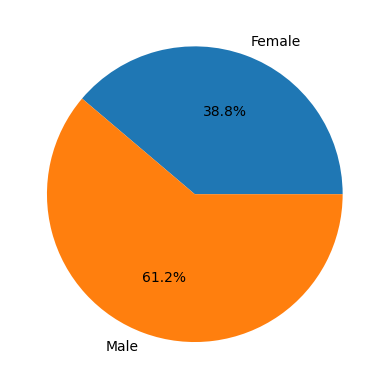

In [ ]:
agent("The income variables is a binary variable (income<=50K or income>50K). Only for income <= 50K Calculate the share (%) by gender. Do a circle plot")

## Part 2

### Serial and Concurrent for 9 questions

In [ ]:
import asyncio
import time
import key
from langchain.agents import initialize_agent, load_tools
from langchain.agents import AgentType
from langchain.llms import OpenAI

from langchain.utilities import SerpAPIWrapper


# Set API keys from environment variables
os.environ["OPENAI_API_KEY"] = key.OPENAI_API_KEY
#os.environ["SERPAPI_API_KEY"] = key.SERPAPIKEY


# Define some history questions to be asked

questions = [
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the Han dynasty established? How long did it last?",
    "When was the Spanish Civil War fought? WHo were involved",
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    #"When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    #"When was the Han dynasty established? How long did it last?",
    #"When was the Spanish Civil War fought? WHo were involved"
]

## Serial execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# Start timer
s = time.perf_counter()

# Run each question sequentially
for q in questions:
    agent.run(q)

# Stop timer and calculate elapsed time
elapsed = time.perf_counter() - s
print(f"Serial executed in {elapsed:0.2f} seconds.")


## Concurrent execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# Start timer
s = time.perf_counter()

# Run all questions concurrently using asyncio and gather results
tasks = [agent.arun(q) for q in questions]
await asyncio.gather(*tasks)

# Stop timer and calculate elapsed time
elapsed = time.perf_counter() - s
print(f"Concurrent executed in {elapsed:0.2f} seconds.")



> Entering new AgentExecutor chain...
 I need to find out when and which countries were involved in the First Hundred Year War.
Action: Wikipedia
Action Input: First Hundred Year War
Observation: Page: Hundred Years' War
Summary: The Hundred Years' War (French: Guerre de Cent Ans; 1337–1453) was a series of armed conflicts fought between the kingdoms of England and France during the Late Middle Ages. It originated from English claims to the French throne. The war grew into a broader power struggle involving factions from across Western Europe, fueled by emerging nationalism on both sides. The periodization of the war takes place over 116 years, wherein the war was interrupted by several years of truces.
The Hundred Years' War was a significant conflict in the Middle Ages. During the war, five generations of kings from two rival dynasties fought for the throne of France, which was then the dominant kingdom in Western Europe. The war had a lasting effect on European history. Both sides

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Han dynasty
Summary: The Han dynasty (UK: , US: ; traditional Chinese: 漢朝; simplified Chinese: 汉朝; pinyin: Hàncháo) was an imperial dynasty of China (202 BC – 9 AD, 25–220 AD), established by Liu Bang and ruled by the House of Liu. The dynasty was preceded by the short-lived Qin dynasty (221–207 BC) and a warring interregnum known as the Chu–Han contention (206–202 BC), and it was succeeded by the Three Kingdoms period (220–280 AD). The dynasty was briefly interrupted by the Xin dynasty (9–23 AD) established by usurping regent Wang Mang, and is thus separated into two periods—the Western Han (202 BC – 9 AD) and the Eastern Han (25–220 AD). Spanning over four centuries, the Han dynasty is considered a golden age in Chinese history, and it has influenced the identity of the Chinese civilization ever since. Modern China's majority ethnic group refer to themselves as the "Han people" or "Han Chinese". The spoken Sinitic language and written Chinese are referred to respe

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: American Civil War
Summary: The American Civil War (April 12, 1861 – May 26, 1865; also known by other names) was a civil war in the United States between the Union ("the North") and the Confederacy ("the South"), which had been formed by states that had seceded from the Union. The cause of the war was the dispute over whether slavery would be permitted to expand into the western territories, leading to more slave states, or be prevented from doing so, which many believed would place slavery on a course of ultimate extinction.
Decades of political controversy over slavery were brought to a head by the victory in the 1860 U.S. presidential election of Abraham Lincoln, who opposed slavery's expansion into the western territories. Seven southern slave states responded to Lincoln's victory by seceding from the United States and forming the Confederacy. The Confederacy seized U.S. forts and other federal assets within their borders. Four more southern states seceded afte

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Order of battle of the Waterloo campaign
Summary: This is the complete order of battle for the four major battles of the Waterloo campaign.

Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Bel

### Serial and Concurrent for 12 questions


In [ ]:
import asyncio
import time
import key
from langchain.agents import initialize_agent, load_tools
from langchain.agents import AgentType
from langchain.llms import OpenAI

from langchain.utilities import SerpAPIWrapper


# Set API keys from environment variables
os.environ["OPENAI_API_KEY"] = key.OPENAI_API_KEY


# Define some history questions to be asked

questions = [
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the Han dynasty established? How long did it last?",
    "When was the Spanish Civil War fought? WHo were involved",
    "When was the First Hundred Year War fought? Which countries were involved? ",
    "When was the American Civil war fought? Who were involved in the war? ",
    "When was the Battle of Waterloo fought? Who were the leaders on either side? ",
    "When was the First war of Indian independence fought? How many years later did India get independence? What was the time gap?",
    "When was the Han dynasty established? How long did it last?",
    "When was the Spanish Civil War fought? WHo were involved"
]

## Serial execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# Start timer
s = time.perf_counter()

# Run each question sequentially
for q in questions:
    agent.run(q)

# Stop timer and calculate elapsed time
elapsed = time.perf_counter() - s
print(f"Serial executed in {elapsed:0.2f} seconds.")


## Concurrent execution ##

# Initialize LangChain with OpenAI LLM and "wikipedia", "llm-math" tools
llm = OpenAI(temperature=0)
tools = load_tools(["wikipedia", "llm-math"], llm=llm)
agent = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

# Start timer
s = time.perf_counter()

# Run all questions concurrently using asyncio and gather results
tasks = [agent.arun(q) for q in questions]
await asyncio.gather(*tasks)

# Stop timer and calculate elapsed time
elapsed = time.perf_counter() - s
print(f"Concurrent executed in {elapsed:0.2f} seconds.")



> Entering new AgentExecutor chain...
 I need to find out when and which countries were involved in the First Hundred Year War.
Action: Wikipedia
Action Input: First Hundred Year War
Observation: Page: Hundred Years' War
Summary: The Hundred Years' War (French: Guerre de Cent Ans; 1337–1453) was a series of armed conflicts fought between the kingdoms of England and France during the Late Middle Ages. It originated from English claims to the French throne. The war grew into a broader power struggle involving factions from across Western Europe, fueled by emerging nationalism on both sides. The periodization of the war takes place over 116 years, wherein the war was interrupted by several years of truces.
The Hundred Years' War was a significant conflict in the Middle Ages. During the war, five generations of kings from two rival dynasties fought for the throne of France, which was then the dominant kingdom in Western Europe. The war had a lasting effect on European history. Both sides

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Belle Alliance ("the Beautiful Alliance") in Prussia.Upon Napoleon's return to power in March 1815 (beginning the Hundred Days), many states that had 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian independence movement
Summary: The Indian independence movement was a series of historic events with the ultimate aim of ending British rule in India also known as British Raj. It lasted until 1947.
The first nationalistic revolutionary movement for Indian independence emerged from Bengal. It later took root in the newly formed Indian National Congress with prominent moderate leaders seeking the right to appear for Indian Civil Service examinations in British India, as well as more economic rights for natives. The first half of the 20th century saw a more radical approach towards self-rule.
The stages of the independence struggle in the 1920s were characterized by the leadership of Mahatma Gandhi and Congress' adoption of Gandhi's policy of non-violence and civil disobedience. Some of the leading followers of Gandhi's ideology were Jawaharlal Nehru, Subhas Chandra Bose, Vallabhbhai Patel, Abdul Ghaffar Khan, Maulana Azad, and others. Intellectuals such as Rab

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Hundred Years' War
Summary: The Hundred Years' War (French: Guerre de Cent Ans; 1337–1453) was a series of armed conflicts fought between the kingdoms of England and France during the Late Middle Ages. It originated from English claims to the French throne. The war grew into a broader power struggle involving factions from across Western Europe, fueled by emerging nationalism on both sides. The periodization of the war takes place over 116 years, wherein the war was interrupted by several years of truces.
The Hundred Years' War was a significant conflict in the Middle Ages. During the war, five generations of kings from two rival dynasties fought for the throne of France, which was then the dominant kingdom in Western Europe. The war had a lasting effect on European history. Both sides produced innovations in military technology and tactics, including professional standing armies and artillery, that permanently changed warfare in Europe; chivalry, which reached its 

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Indian Rebellion of 1857
Summary: The Indian Rebellion of 1857 was a major uprising in India in 1857–58 against the rule of the British East India Company, which functioned as a sovereign power on behalf of the British Crown. The rebellion began on 10 May 1857 in the form of a mutiny of sepoys of the Company's army in the garrison town of Meerut, 40 mi (64 km) northeast of Delhi. It then erupted into other mutinies and civilian rebellions chiefly in the upper Gangetic plain and central India, though incidents of revolt also occurred farther north and east. The rebellion posed a military threat to British power in that region, and was contained only with the rebels' defeat in Gwalior on 20 June 1858. On 1 November 1858, the British granted amnesty to all rebels not involved in murder, though they did not declare the hostilities to have formally ended until 8 July 1859. 
The name of the revolt is contested, and it is variously described as the Sepoy Mutiny, the Indian

/usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.10/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')



Observation: Page: Order of battle of the Waterloo campaign
Summary: This is the complete order of battle for the four major battles of the Waterloo campaign.

Page: Battle of Waterloo
Summary: The Battle of Waterloo (Dutch pronunciation: [ˈʋaːtərloː] ) was fought on Sunday 18 June 1815, near Waterloo (at that time in the United Kingdom of the Netherlands, now in Belgium), marking  the end of the Napoleonic Wars. A French army under the command of Napoleon was defeated by two armies of the Seventh Coalition. One of these was a British-led force with units from the United Kingdom, the Netherlands, Hanover, Brunswick, and Nassau, under the command of the Duke of Wellington (often referred to as the Anglo-allied army or Wellington's army). The other comprised three corps of the Prussian army under Field Marshal von Blücher (the fourth corps of this army fought at the Battle of Wavre on the same day). The battle was known contemporarily as the Battle of Mont Saint-Jean in France or La Bel

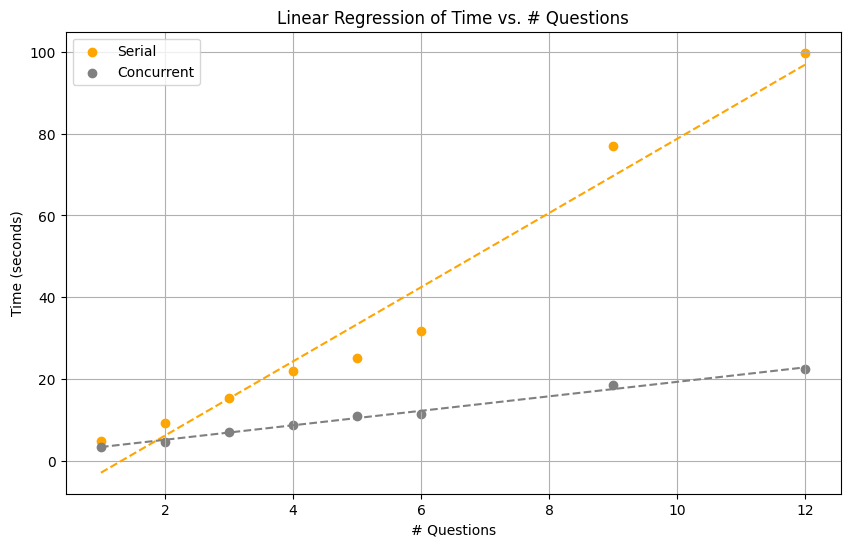

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
questions = [1, 2, 3, 4, 5, 6, 9, 12]
serial_times = [4.95, 9.42, 15.38, 22.11, 25.19, 31.71, 76.99, 99.73]
concurrent_times = [3.49, 4.78, 7.22, 8.81, 11.03, 11.45, 18.48, 22.44]

# Linear regression
serial_x = np.array(questions).reshape(-1, 1)
serial_y = np.array(serial_times)
concurrent_x = np.array(questions).reshape(-1, 1)
concurrent_y = np.array(concurrent_times)

serial_reg = LinearRegression().fit(serial_x, serial_y)
concurrent_reg = LinearRegression().fit(concurrent_x, concurrent_y)

# Predictions
serial_pred = serial_reg.predict(serial_x)
concurrent_pred = concurrent_reg.predict(concurrent_x)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(questions, serial_times, color='orange', label='Serial')
plt.plot(questions, serial_pred, linestyle='--', color='orange')
plt.scatter(questions, concurrent_times, color='grey', label='Concurrent')
plt.plot(questions, concurrent_pred, linestyle='--', color='grey')

plt.xlabel('# Questions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Linear Regression of Time vs. # Questions')
plt.grid(True)
plt.show()


It is direct to see that both the Serial and Concurrent methods increases the execution time when the number of questions increases. The Concuerrent has a lower slope and fits reasonably good with a linear regression.

Concurrent execution should be faster than serial execution because it allows multiple tasks to run simultaneously, reducing the overall time required. This might result in a linear relationship between the number of questions and execution time.

On the other hand, serial execution processes each question one after the other, and as the number of questions increases, the execution time increases linearly or possibly even exponentially if the processing time for each question increases with the number of questions.

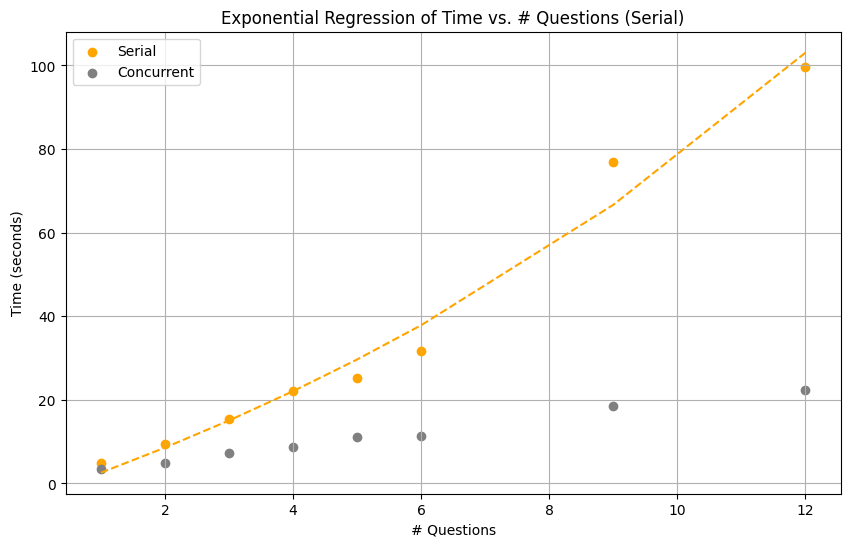

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data
questions = np.array([1, 2, 3, 4, 5, 6, 9, 12])
serial_times = np.array([4.95, 9.42, 15.38, 22.11, 25.19, 31.71, 76.99, 99.73])
concurrent_times = np.array([3.49, 4.78, 7.22, 8.81, 11.03, 11.45, 18.48, 22.44])

# Define an exponential function
def exponential_func(x, a, b, c):
    return a * np.exp(b * x) + c

# Fit the exponential model to the serial data
popt, _ = curve_fit(exponential_func, questions, serial_times)

# Generate values for the fitted curve
serial_fitted = exponential_func(questions, *popt)

# Plot the data and fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(questions, serial_times, color='orange', label='Serial')
plt.plot(questions, serial_fitted, linestyle='--', color='orange')
plt.scatter(questions, concurrent_times, color='grey', label='Concurrent')
plt.xlabel('# Questions')
plt.ylabel('Time (seconds)')
plt.legend()
plt.title('Exponential Regression of Time vs. # Questions (Serial)')
plt.grid(True)
plt.show()


According to this data, is possible to see that the Serial responds more to an exponential function.

## Part 3

Use of pydantic for formatting output

### Subpart 1

As you did in HW1, write a prompt to extract the following from the review above

In [ ]:
from langchain import PromptTemplate
from langchain.chains import LLMChain

In [ ]:
# Define the template for analyzing a restaurant overall score
template_overall = """
Analyze this restaurant review: {review}
Give the overall sentiment using 1-5 scale, where 1=poor, 5=excellent. Just give me a number. Nothing else.
"""

prompt_template_overall = PromptTemplate(
  template=template_overall,
  input_variables=["review"],
)

# Define the template to extract score from each attribute
template_attscore = """
In the context of {review}.
- Is the Food mentioned? If not directly mentioned, look for similar words such as flavor, or spicyness, what is the sentiment (Positive or Negative = Boolean, i.e., binary)
- Is the Service mentioned? If not directly mentioned, look for similar words such as speed(positive), or mood, what is the sentiment (Positive or Negative = Boolean, i.e., binary)
Do not reply anything yet.
Regarding {attribute} select which represent the sentiment the most: positive, negative.
Just one word. Nothing else.
"""

prompt_template_attscore = PromptTemplate(
  template=template_attscore,
  input_variables=["review","attribute"],
)

# Initialize ChatOpenAI with the API key
llm = ChatOpenAI(temperature=0, model_name="gpt-4", openai_api_key=OPENAI_API_KEY)

# Define the LLMChains
chain_overall = LLMChain(llm=llm, prompt=prompt_template_overall)
chain_attscore = LLMChain(llm=llm, prompt=prompt_template_attscore)

# Example restaurant review
review_1 = """
“My husband and I came here for a quick dinner last night, before visiting The Hideaway club down the road. From the moment we walked in, we were greeted with a warm and friendly service. The decor is quirky and inviting and we immediately felt comfortable. I love that the menu is quite small and uncomplicated. We chose several starter dishes and two main dishes, which was plenty to fill us up - This is not your “run of the mill” Chinese food. Everything is cooked fresh and you can taste the difference in comparison to some other restaurants.”
"""

# Define a dictionary to store the analysis results
results = {
    1: {"Overall": None, "Food": None},

}

# Run the chain with the review
reviews = [review_1]

for i, review in enumerate(reviews, start=1):
    sentiment = chain_overall.run(review=review)
    print(f"Overall Sentiment for Review {i}: {sentiment}")
    print("-------------")

    attributes = ["Food", "Service"]
    attr_scores = {}
    for attribute in attributes:
        score = chain_attscore.run(review=review, attribute=attribute)
        attr_scores[attribute] = score
        print(f"{attribute}: {score}")

    # Update the results dictionary
    results[i] = {"Overall": sentiment, **attr_scores}
    print("-------------\n")



Overall Sentiment for Review 1: 5
-------------
Food: Positive
Service: Positive
-------------



### Subpart 2

Use pydantic to ensure the types and also the conditions (1-5, Boolean etc.). Show output


In [ ]:
#Using pydantic for parsiing
from langchain.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field, validator        #Pydantic objects

# Define your desired output data structure.
class ReviewScore(BaseModel):
    overall: int = Field(description="Overall score", ge=1, le=5)
    food: bool = Field(description="This is a binary variable, 0: positive 1: negative")
    service: bool = Field(description="This is a binary variable, 0: positive 1: negative")

# Custom validator for overall score
    @validator('overall')
    def validate_overall(cls, value):
        if not (1 <= value <= 5):
            raise ValueError("Overall score must be between 1 and 5")
        return value

    # Custom validator for food score
    @validator('food')
    def validate_food(cls, value):
        if value not in (0, 1):
            raise ValueError("Food score must be 0 or 1")
        return value

    # Custom validator for service score
    @validator('service')
    def validate_service(cls, value):
        if value not in (0, 1):
            raise ValueError("Service score must be 0 or 1")
        return value



# Set up a parser + inject instructions into the prompt template.
pydantic_parser = PydanticOutputParser(pydantic_object=ReviewScore)
format_instructions = pydantic_parser.get_format_instructions()
print(format_instructions)

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"overall": {"title": "Overall", "description": "Overall score", "minimum": 1, "maximum": 5, "type": "integer"}, "food": {"title": "Food", "description": "This is a binary variable, 0: positive 1: negative", "type": "boolean"}, "service": {"title": "Service", "description": "This is a binary variable, 0: positive 1: negative", "type": "boolean"}}, "required": ["overall", "food", "service"]}
```


### Subpart 3

Parse the JSON output from pydantic and check the three types.

In [ ]:
from langchain.chat_models import ChatOpenAI
from langchain import PromptTemplate

# Example restaurant review
review = """
“My husband and I came here for a quick dinner last night, before visiting The Hideaway club down the road. From the moment we walked in, we were greeted with a warm and friendly service. The decor is quirky and inviting and we immediately felt comfortable. I love that the menu is quite small and uncomplicated. We chose several starter dishes and two main dishes, which was plenty to fill us up - This is not your “run of the mill” Chinese food. Everything is cooked fresh and you can taste the difference in comparison to some other restaurants.”
"""

# Define the template to extract score from each attribute
template = """
In the context of {review}.
- Give the overall sentiment using 1-5 scale, where 1=poor, 5=excellent. Just give me a number. Nothing else.
- Is the Food mentioned? If not directly mentioned, look for similar words such as flavor, or spicyness, what is the sentiment (Positive or Negative = Boolean, i.e., binary)
- Is the Service mentioned? If not directly mentioned, look for similar words such as speed(positive), or mood, what is the sentiment (Positive or Negative = Boolean, i.e., binary)
Do not reply anything yet.
Regarding {attribute} select which represent the sentiment the most: positive, negative.
Just one word. Nothing else.

{format_instructions}
"""


prompt_template = PromptTemplate(
  template=template,
  input_variables=["review"],
)

# Initialize ChatOpenAI with the API key
llm = ChatOpenAI(temperature=0, model_name="gpt-4", openai_api_key=OPENAI_API_KEY)

# Define the LLMChains

chain = LLMChain(llm=llm, prompt=prompt_template)

score = chain.run(review=review, attribute=attribute, format_instructions=format_instructions)
print(score)

{"overall": 5, "food": false, "service": false}


In [ ]:
review = pydantic_parser.parse(score)

review

ReviewScore(overall=5, food=False, service=False)

In [ ]:
review.overall

5

In [ ]:
type(review.overall)

int

In [ ]:
review.food

False

In [ ]:
type(review.food)

bool

In [ ]:
review.service

False

In [ ]:
type(review.service)

bool